# Fast Fourier Transform (FFT)

Understand the basics of the Fast Fourier Transform (FFT) and how to compute the power spectral density (PSD) of a time series signal.

In [68]:
import torch

# Create a random tensor of length 5
time_series = torch.randn(3600 // 5)
sampling_rate = 30
freq_range = (0.1, 0.5)

# Calculate the frequency step size from the sampling rate
freq_step = sampling_rate / time_series.shape[0]
num_freqs = round((freq_range[1] - freq_range[0]) / freq_step)
print(f'Step size: {freq_step:.2f}')
print(f'Num freqs: {num_freqs:.2f}')

# Compute the power spectral density (PSD) using periodogram
psd = (torch.fft.fft(time_series).abs() ** 2) / time_series.shape[0]

psd = psd[:len(psd) // 2]
freq = torch.fft.fftfreq(time_series.shape[0], 1 / sampling_rate)[:len(psd)]

step_size = freq[1] - freq[0]
print(f'Frequency step size: {step_size:.2f} Hz ({step_size * sampling_rate:.2f} BPM)')

# Number of frequencies between the range [0.1, 0.5] Hz in the PSD
num_freqs = ((freq >= freq_range[0]) & (freq <= freq_range[1])).sum().item()
print(f'Number of frequencies: {num_freqs}')

Step size: 0.04
Num freqs: 10.00
Frequency step size: 0.04 Hz (1.25 BPM)
Number of frequencies: 10


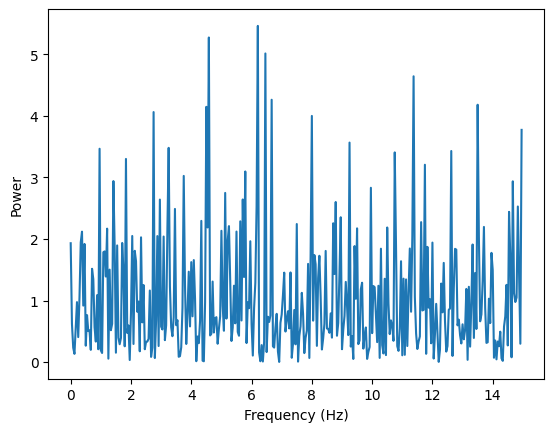

In [69]:
# Plot the PSD
import matplotlib.pyplot as plt

plt.figure()
plt.plot(freq, psd)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power')
plt.show()